In [1]:
import os
from os.path import join, basename
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
from tqdm.notebook import tqdm
import numpy as np
from scipy import interpolate
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Get project root
PROJECT_ROOT = os.path.dirname(os.path.realpath('__file__'))

In [3]:
def get_df(df_name, num_buckets = 10, len_vector = 100000):
    df = pd.read_csv(join(PROJECT_ROOT, "data", df_name))
    df.columns = ["threads", "len_vector", "num_buckets", "execution_time"]
    original_shape = df.shape[0]
    
    # Drop rows with duplicates on threads, len_vector and num_buckets
    df = df.drop_duplicates(subset=["threads", "len_vector", "num_buckets"])
    after_shape = df.shape[0]

    print("Dropped {} rows with from the original".format(original_shape - after_shape))

    df = df[df["num_buckets"] == num_buckets]
    df = df[df["len_vector"] == len_vector] 
    after_filtering_shape = df.shape[0]

    print("Dropped {} rows after filtering".format(after_shape - after_filtering_shape))

    return df

In [20]:
seq_best_df = get_df("sequential_best.csv")
tempo_seq = float(seq_best_df.execution_time)

Dropped 0 rows with from the original
Dropped 40 rows after filtering


In [29]:
def plot_graphs(df_name, savepath=join(PROJECT_ROOT, "graficos")):
    # Define stuff
    figsize=(7, 5)
    df = get_df(df_name)
    exec_time_savepath = join(savepath, "execution_time" + df_name.replace(".csv", ".png"))
    speed_up_savepath = join(savepath, "speed_up" + df_name.replace(".csv", ".png"))


    # Plot execution time vs threads
    plt.plot(df.threads,df.execution_time,'--o')
    plt.xlabel('Number of threads')
    plt.ylabel('Excution time (s)')
    plt.show()
    plt.savefig(exec_time_savepath)

    # Plot speed up vs threads
    plt.plot(df.threads, tempo_seq/df.execution_time,'--bo')
    plt.xlabel('Number of threads')
    plt.ylabel('Speed up')
    plt.show()
    plt.savefig(speed_up_savepath)

# Parallel second loop schedule

Dropped 49 rows with from the original
Dropped 286 rows after filtering


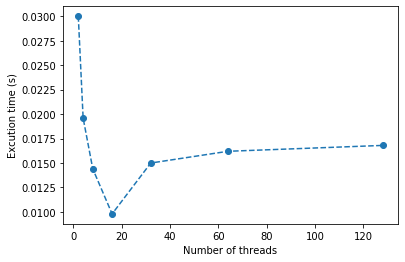

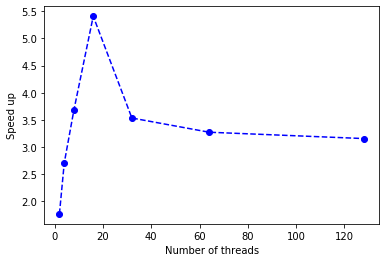

<Figure size 432x288 with 0 Axes>

In [30]:
plot_graphs("parallel_2_loop_schedule.csv")


# Parallel second loop omp

Dropped 49 rows with from the original
Dropped 286 rows after filtering


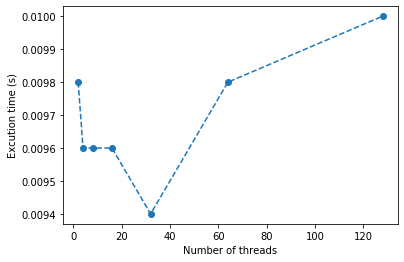

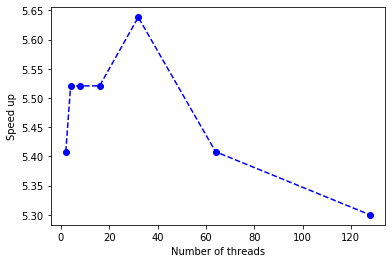

<Figure size 432x288 with 0 Axes>

In [31]:
plot_graphs("parallel_2_loop_omp.csv")

# Parallel first loop 

Dropped 49 rows with from the original
Dropped 286 rows after filtering


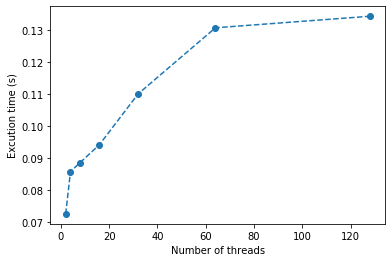

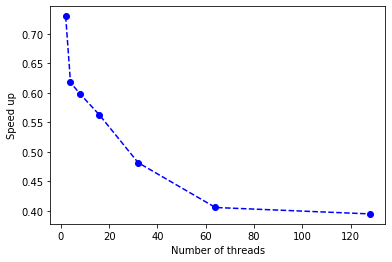

<Figure size 432x288 with 0 Axes>

In [32]:
plot_graphs("parallel_1_loop.csv")

# Parallel third loop

Dropped 0 rows with from the original
Dropped 286 rows after filtering


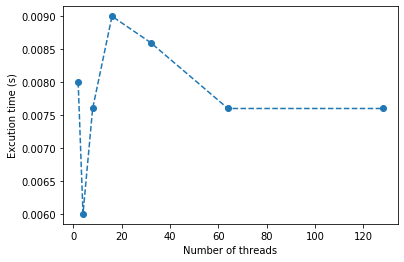

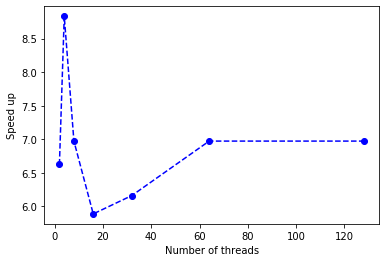

<Figure size 432x288 with 0 Axes>

In [33]:
plot_graphs("parallel_3_loop.csv")

# Parallel quicksort

Dropped 0 rows with from the original
Dropped 286 rows after filtering


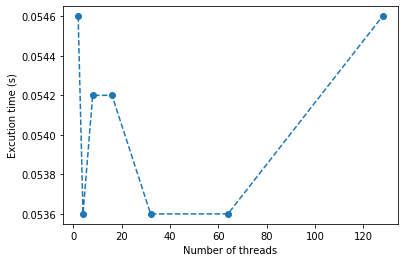

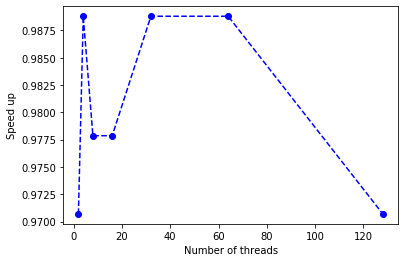

<Figure size 432x288 with 0 Axes>

In [34]:
# a tua versão
plot_graphs("parallel_quicksort.csv")

Dropped 0 rows with from the original
Dropped 286 rows after filtering


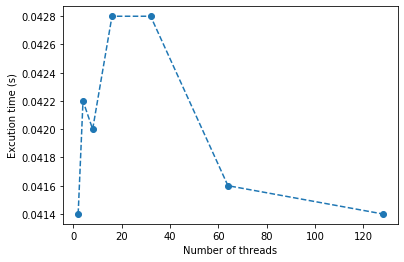

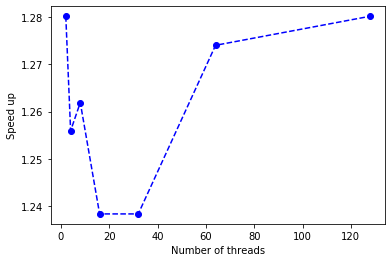

<Figure size 432x288 with 0 Axes>

In [35]:

# pragma dentro da função e não na chamada - como o stor sem o single na segunda task
plot_graphs("parallel_quicksort2.csv")


Dropped 293 rows with from the original
Dropped 287 rows after filtering


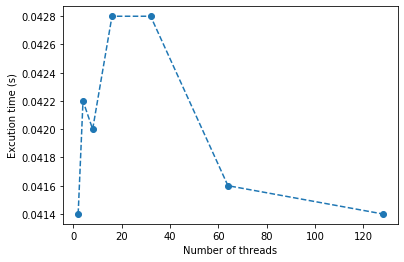

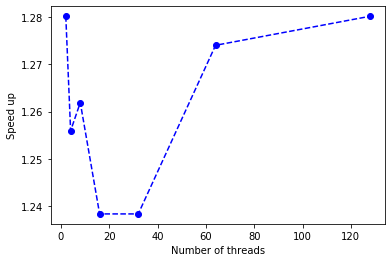

<Figure size 432x288 with 0 Axes>

In [36]:
# codigo que esta la mas sem comment no quick 2
plot_graphs("quick3.csv")

Dropped 0 rows with from the original
Dropped 286 rows after filtering


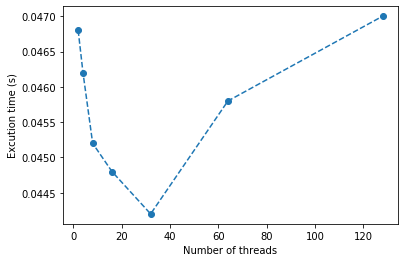

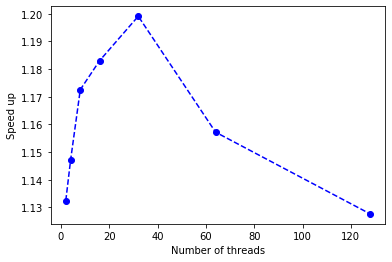

<Figure size 432x288 with 0 Axes>

In [37]:
# NOVO
plot_graphs("parallel_4_quick_sort_2.csv")


Dropped 0 rows with from the original
Dropped 286 rows after filtering


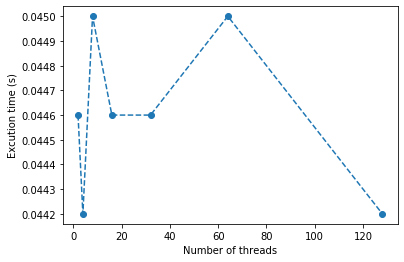

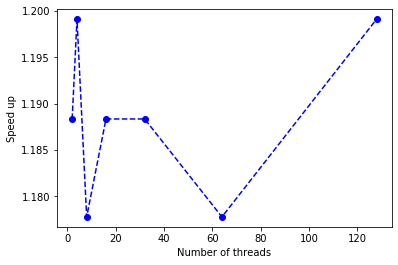

<Figure size 432x288 with 0 Axes>

In [38]:
# codigo que esta la mas sem comment no quick 2
plot_graphs("parallel_quick_sort_3.csv")